<a href="https://colab.research.google.com/github/MedBALBSIR/PC-labs-MLF-BALBSIR-Mohammed/blob/main/MPA_MLF_PCA_2_students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA through Singular Value Decomposition

In [ ]:

import numpy as np

# Defined 3 points in 2D-space:
X = np.array([[2, 1, 0], [4, 3, 0]])

# Calculate the covariance matrix:
X_centered = X - X.mean(axis=1, keepdims=True)
cov_matrix = np.cov(X_centered)

# Calculate the SVD decomposition and new basis vectors:
U, D, V = np.linalg.svd(cov_matrix)
u1 = U[:, 0]  # new basis vectors
u2 = U[:, 1]

# Calculate the coordinates in new orthonormal basis:
X_transformed = np.dot(U.T, X_centered)

# Calculate the approximation of the original from new basis
X_approx = np.dot(U, X_transformed) + X.mean(axis=1, keepdims=True)

# Check that you got the original
print(X_approx)


[[2.00000000e+00 1.00000000e+00 7.77156117e-16]
 [4.00000000e+00 3.00000000e+00 0.00000000e+00]]


# PCA on Iris data

In [11]:
# Load Iris dataset as in the last PC lab:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[:])



['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


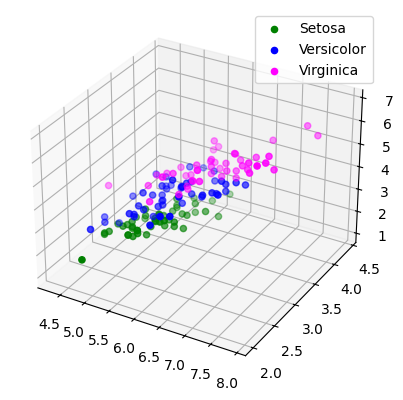

In [14]:

# We have 4 dimensions of data, plot the first three columns in 3D
X = iris.data
y = iris.target

fig = plt.figure()
axes1 = fig.add_subplot(111, projection='3d')
axes1.scatter(X[y == 0, 0], X[y == 0, 1], X[y == 0, 2], color='green', label='Setosa')
axes1.scatter(X[y == 1, 0], X[y == 1, 1], X[y == 1, 2], color='blue', label='Versicolor')
axes1.scatter(X[y == 2, 0], X[y == 2, 1], X[y == 2, 2], color='magenta', label='Virginica')
plt.legend()
plt.show()



[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


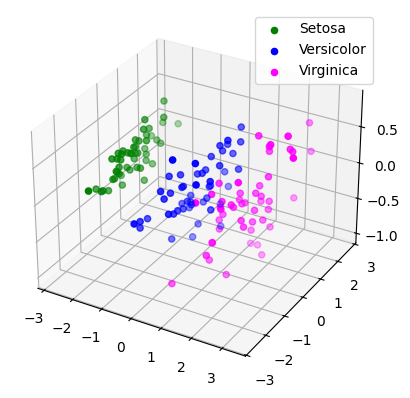

In [17]:


# Pre-processing is an important step, you can try either StandardScaler (zero mean, unit variance of features)
# or MinMaxScaler (to interval from 0 to 1)
Xscaler = StandardScaler()
Xpp = Xscaler.fit_transform(X)

# Define PCA object (three components), fit and transform the data
pca = decomposition.PCA(n_components=3)
pca.fit(Xpp)
Xpca = pca.transform(Xpp)
print(pca.get_covariance())

# You can plot the transformed feature space in 3D:
fig = plt.figure()
axes2 = fig.add_subplot(111, projection='3d')
axes2.scatter(Xpca[y == 0, 0], Xpca[y == 0, 1], Xpca[y == 0, 2], color='green', label='Setosa')
axes2.scatter(Xpca[y == 1, 0], Xpca[y == 1, 1], Xpca[y == 1, 2], color='blue', label='Versicolor')
axes2.scatter(Xpca[y == 2, 0], Xpca[y == 2, 1], Xpca[y == 2, 2], color='magenta', label='Virginica')
plt.legend()
plt.show()


In [22]:
# Compute pca.explained_variance_ and pca.explained_cariance_ratio_values
pca.explained_variance_
explained_variance = pca.explained_variance_


print("Explained Variance:", explained_variance)


Explained Variance: [2.93808505 0.9201649  0.14774182]


In [23]:
pca.explained_variance_ratio_
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)


Explained Variance Ratio: [0.72962445 0.22850762 0.03668922]


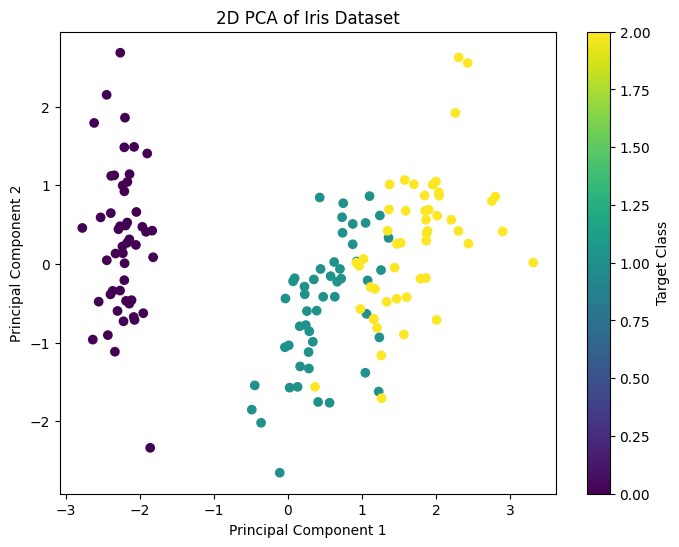

In [24]:
# Plot the principal components in 2D, mark different targets in color
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(Xpca[:, 0], Xpca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of Iris Dataset')
plt.colorbar(label='Target Class')
plt.show()


# KNN classifier

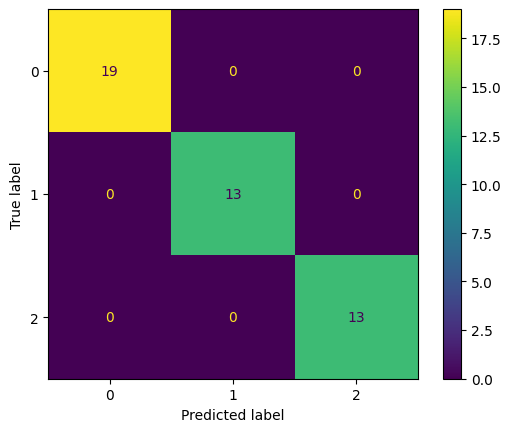

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the KNN classifier
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_train, y_train)

# Predict on the test set
Ypred = knn1.predict(X_test)

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, Ypred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn1.classes_)
disp.plot()
plt.show()

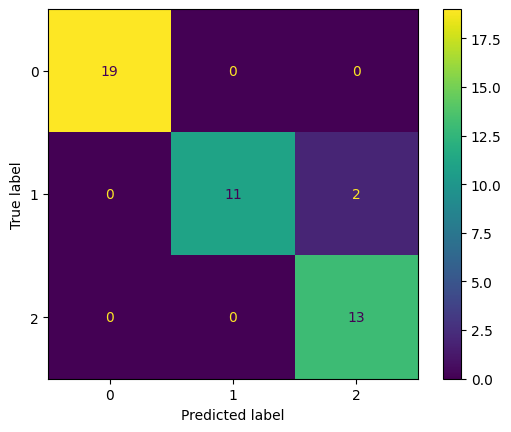

Confusion Matrix for Full Dataset:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Confusion Matrix for PCA-Transformed Data (First Two Components):
[[19  0  0]
 [ 0 11  2]
 [ 0  0 13]]


In [31]:
# Now do the same (data set split, KNN, confusion matrix), but for PCA-transformed data (1st two principal components, i.e., first two columns).
# Compare the results with full dataset
# Use the first two principal components for KNN
Xpca_train, Xpca_test, y_train, y_test = train_test_split(Xpca[:, :2], y, test_size=0.3, random_state=42)

# Initialize and train the KNN classifier on PCA-transformed data
knn2 = KNeighborsClassifier(n_neighbors=3)
knn2.fit(Xpca_train, y_train)

# Predict on the test set
Ypred_pca = knn2.predict(Xpca_test)

# Generate and display the confusion matrix for PCA-transformed data
cm_pca = confusion_matrix(y_test, Ypred_pca)
disp_pca = ConfusionMatrixDisplay(confusion_matrix=cm_pca, display_labels=knn2.classes_)
disp_pca.plot()
plt.show()

# Compare results
print("Confusion Matrix for Full Dataset:")
print(cm)
print("\nConfusion Matrix for PCA-Transformed Data (First Two Components):")
print(cm_pca)


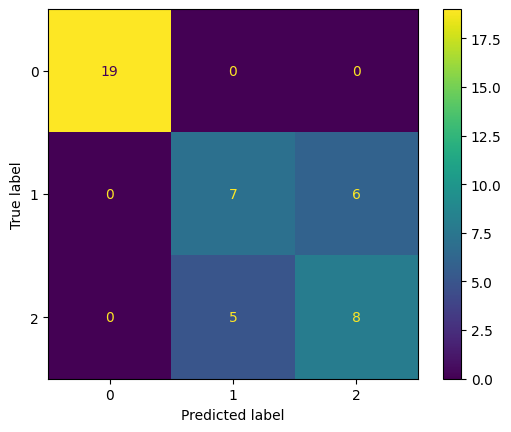

Confusion Matrix for Full Dataset:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Confusion Matrix for PCA-Transformed Data (First Two Components):
[[19  0  0]
 [ 0 11  2]
 [ 0  0 13]]

Confusion Matrix for 2D Original Data:
[[19  0  0]
 [ 0  7  6]
 [ 0  5  8]]


In [33]:
# Now do the same, but use only 2-dimensional data of original X (first two columns)
# Use the first two columns of the original data for KNN
X_2d = X[:, :2]
X_2d_train, X_2d_test, y_train, y_test = train_test_split(X_2d, y, test_size=0.3, random_state=42)

# Initialize and train the KNN classifier on 2D original data
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_2d_train, y_train)

# Predict on the test set
Ypred_2d = knn3.predict(X_2d_test)

# Generate and display the confusion matrix for 2D original data
cm_2d = confusion_matrix(y_test, Ypred_2d)
disp_2d = ConfusionMatrixDisplay(confusion_matrix=cm_2d, display_labels=knn3.classes_)
disp_2d.plot()
plt.show()

# Compare results
print("Confusion Matrix for Full Dataset:")
print(cm)
print("\nConfusion Matrix for PCA-Transformed Data (First Two Components):")
print(cm_pca)
print("\nConfusion Matrix for 2D Original Data:")
print(cm_2d)

